# Building a CNN Model from scratch using MNIST Dataset

## Hanif Adedotun

Convolutional Neural Networks (CNN) primarily consist of convolutional layers, where each layer applies a set of learnable filters (also called kernels) to the input data. These filters slide over the input
data, performing element-wise multiplication with local patches and then summing the results to produce feature maps. Convolutional layers are capable of capturing spatial hierarchies of features in the input data.

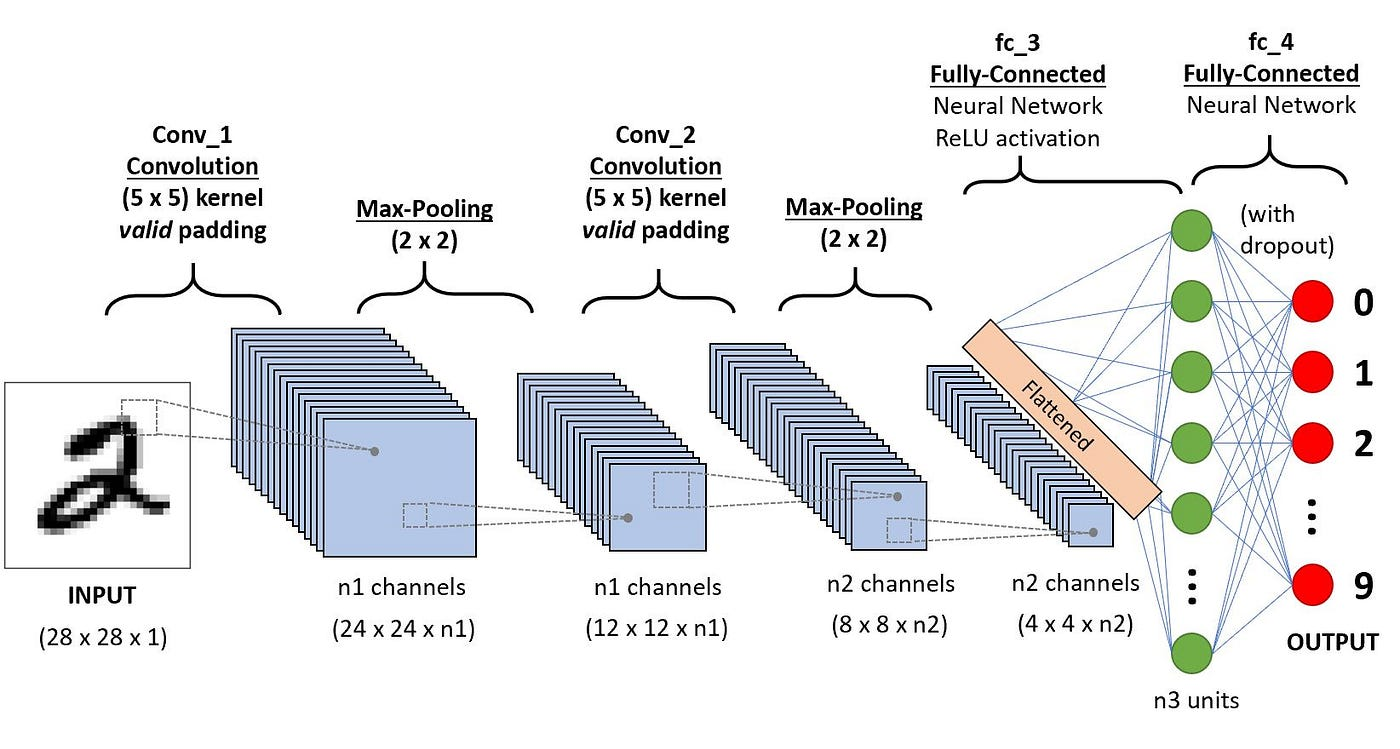

A figure of a CNN Model and how it classifies images

## Components of a COnvolutional Neural Network

1. Convolutional Layer: This layer applies a set of learnable filters or kernels to the input data.

2. Activation Function: - An activation function (e.g., ReLU, sigmoid, tanh) is applied elementwise to the output of the convolutional layer.
- It introduces non-linearity, allowing the network to learn complex patterns.

3. Pooling Layer: - This layer performs down-sampling, reducing the spatial dimensions of the input.
- Common pooling operations are max pooling and average pooling.
- Pooling helps to reduce computational complexity and introduces translation invariance.

4. Fully Connected Layer: - Flattens the output from the previous layers into a one-dimensional vector.
- Applies fully connected operations, similar to multilayer perceptron.
- Used for classification or regression tasks.

5. Softmax or Output Layer: - Generates the final output probabilities or values for the target classes or outputs.

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import random
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random
import torch

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/hojjatk/mnist-dataset/train-images.idx3-ubyte
/kaggle/input/d/hojjatk/mnist-dataset/t10k-labels.idx1-ubyte
/kaggle/input/d/hojjatk/mnist-dataset/t10k-images.idx3-ubyte
/kaggle/input/d/hojjatk/mnist-dataset/train-labels.idx1-ubyte
/kaggle/input/d/hojjatk/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte
/kaggle/input/d/hojjatk/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
/kaggle/input/d/hojjatk/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte
/kaggle/input/d/hojjatk/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte
/kaggle/input/mnist-dataset/1ovzCh2tqfqoRbxtV5Zk5nU5zbBzrUlax


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision
from keras.datasets import mnist
from mlxtend.data import loadlocal_mnist
%matplotlib inline
import os

2024-06-20 23:03:11.290762: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-20 23:03:11.290865: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-20 23:03:11.440700: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
training_images_filepath = '/kaggle/input/d/hojjatk/mnist-dataset/train-images.idx3-ubyte'
training_labels_filepath = '/kaggle/input/d/hojjatk/mnist-dataset/train-labels.idx1-ubyte'
test_images_filepath = '/kaggle/input/d/hojjatk/mnist-dataset/t10k-images.idx3-ubyte'
test_labels_filepath = '/kaggle/input/d/hojjatk/mnist-dataset/t10k-labels.idx1-ubyte'

In [7]:
X_train, y_train = loadlocal_mnist( training_images_filepath, training_labels_filepath)
X_test, y_test = loadlocal_mnist(test_images_filepath, test_labels_filepath)

In [8]:
print('Dimension of training images:', np.shape(X_train))
print('Dimension of trainig labels:',np.shape(y_train))
print('Dimension of testing images:', np.shape(X_test))
print('Dimension of testing labels:',np.shape(y_test))

Dimension of training images: (60000, 784)
Dimension of trainig labels: (60000,)
Dimension of testing images: (10000, 784)
Dimension of testing labels: (10000,)


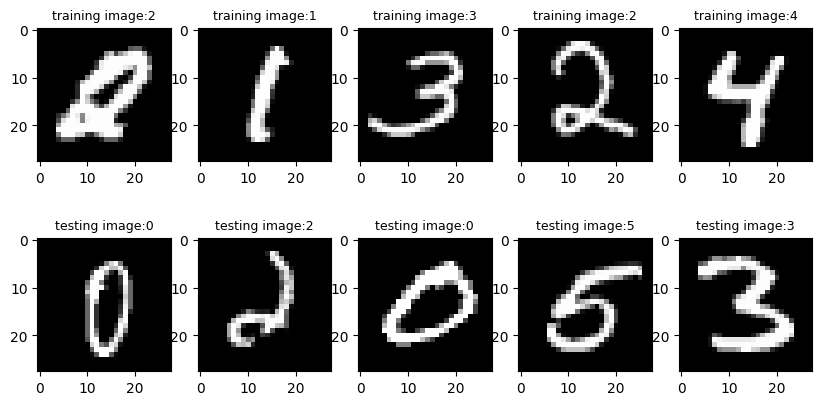

In [9]:
def show(image, title):
    index = 1 
    plt.figure(figsize=(10,5))

    for x in zip(image, title):        
        image = x[0]        
        title = x[1]
        plt.subplot(2, 5, index)        
        plt.imshow(image, cmap=plt.cm.gray)  
        plt.title(x[1], fontsize = 9)
        index += 1
        
image = []
title = []

X_train_reshape = X_train.reshape(60000, 28, 28)
X_test_reshape = X_test.reshape(10000, 28, 28)

for i in range(0, 5):
    r = random.randint(1, len(X_train_reshape))
    image.append(X_train_reshape[r])
    title.append('training image:' + str(y_train[r]))       

for i in range(0, 5):
    r = random.randint(1, len(X_test_reshape))
    image.append(X_test_reshape[r])
    title.append('testing image:' + str(y_test[r]))
    
show(image, title)

In [10]:
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Assuming you have X_train, y_train, X_test, and y_test arrays

# Create train and test datasets
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

# Create train and test loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [11]:
def set_seed(seed):
    # Set the seed for Python's built-in random module
    random.seed(seed)
    # Set the seed for NumPy
    np.random.seed(seed)
    # Set the seed for PyTorch
    torch.manual_seed(seed)
    # If using GPU
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        # Ensure deterministic behavior in CUDA operations
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

In [12]:
seed = 42
set_seed(seed)

In [13]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        # Fully connected layers
        self.fc1 = nn.Linear(21632, 128)  # Calculate input size after flattening
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        
        x = F.max_pool2d(x, 2)
        x = F.relu(self.fc1(x.view(-1, 21632)))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [14]:
# Initialize the model
model = CNN()

# Define optimizer with weight decay
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.001)

# Define the loss function
criterion = nn.CrossEntropyLoss()

In [15]:
# Check if CUDA is available and move model and data to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Move model to device
model.to(device)

# Move data to device
for data, target in train_loader:
    data, target = data.to(device), target.to(device)


In [16]:
device

device(type='cuda', index=0)

In [17]:
def plot_loss(average_losses):
    print(average_losses)
    plt.plot(average_losses, label=f'11 Epochs')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    plt.show()

In [32]:
def train(model, train_loader, optimizer, criterion, num_epochs):
    model.train()
    losses = []
    average_losses = []
    for epoch in range(num_epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)  # Move data to GPU
            data = data.unsqueeze(1)  # Add a channel dimension (channels = 1 for grayscale images)
            data = data.view(-1, 1, 28, 28)  # Reshape the data to match the expected input shape
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            if batch_idx % 100 == 0:
                losses.append(loss.item())
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader), loss.item()))
        average_losses = sum(losses) / len(losses)
        losses = []
        
    plot_loss(losses)

    

In [19]:
# Test function
def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)  # Move data to the same device as the model
            data = data.unsqueeze(1)  # Add a channel dimension (channels = 1 for grayscale images)
            data = data.view(-1, 1, 28, 28)  # Reshape the data to match the expected input shape
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), accuracy))

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.474088
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.322082
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.253096
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.135954
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.145460
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.081389
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.159870
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.036489
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.148268
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.060496
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.029493
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.016184
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.039915
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.005833
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.010054
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.043325
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.011024
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.262870
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.120093
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.062924
Train Epoch:

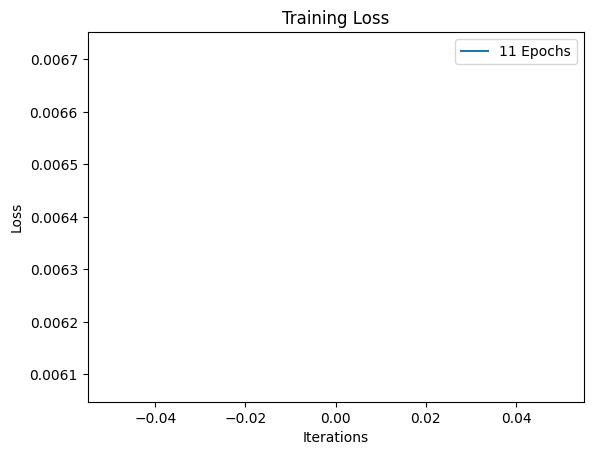


Test set: Average loss: 0.0000, Accuracy: 9870/10000 (98.70%)



In [20]:
train(model, train_loader, optimizer, criterion, 11)
test(model, test_loader)

### Visualizing the Model, getting the leanred filters

Visualizing the learned filters in the first convolutional layer can provide insights into what features they are detecting. 

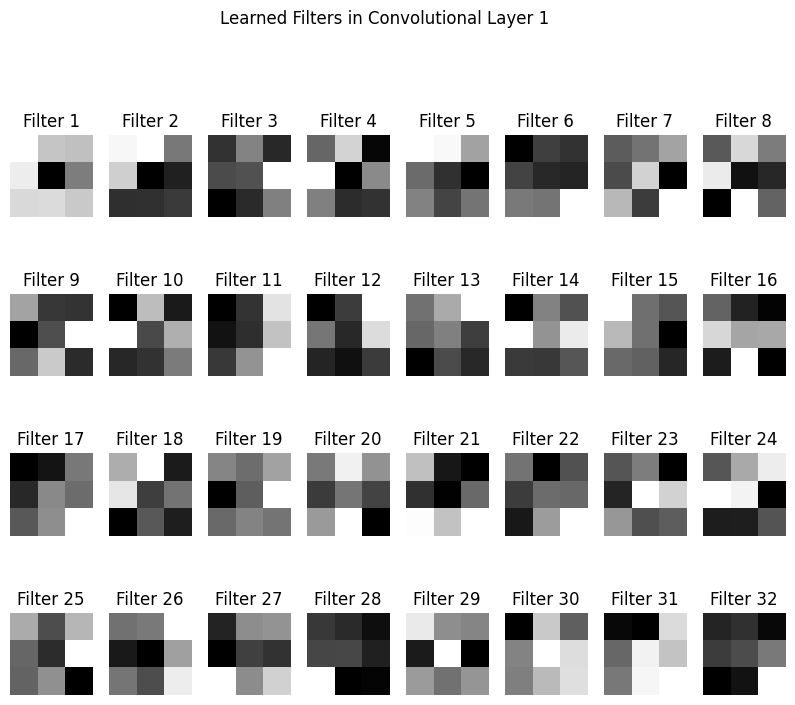

In [21]:
# Get the weights of the first convolutional layer
conv1_weights = model.conv1.weight.data.cpu().numpy()

# Plot the learned filters
num_filters = conv1_weights.shape[0]
num_cols = 8  # Number of columns for subplots
num_rows = num_filters // num_cols + 1  
plt.figure(figsize=(10, 10))
for i in range(num_filters):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(conv1_weights[i, 0], cmap='gray')
    plt.axis('off')
    plt.title(f'Filter {i+1}')
plt.suptitle('Learned Filters in Convolutional Layer 1')
plt.show()


# Evaluation and Analysis

## Training without regularization

In [22]:
# Define optimizer without the weight decay regularization
optimizer_without_opt = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.001)


Train Epoch: 0 [0/60000 (0%)]	Loss: 0.001593
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.000803
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.001605
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.035515
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.059105
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.010949
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.000838
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.004153
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.027863
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.005451
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.024796
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.001977
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.005023
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.025002
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.000220
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.002818
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.086733
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.004356
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.029143
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.038677
Train Epoch:

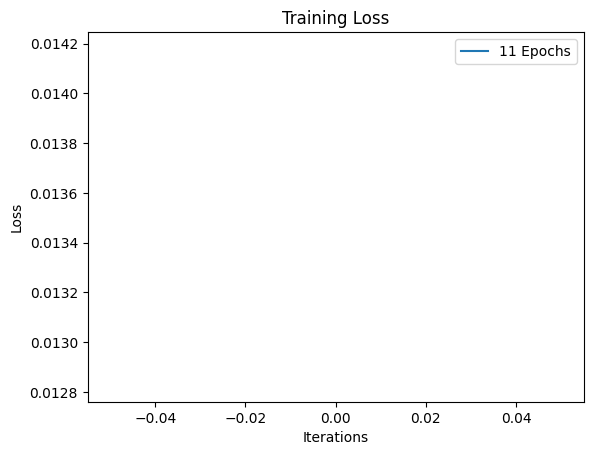


Test set: Average loss: 0.0001, Accuracy: 9862/10000 (98.62%)



In [23]:
train(model, train_loader, optimizer_without_opt, criterion, 11) 
test(model, test_loader)

The accuracy with regularization was **(98.7%)**, and then without regularization it gave **(98.47%)** accuracy 

## Experimenting with different dropout rates

## Drop out Rate
The dropout rate is a hyperparameter that determines the probability of dropping out a neuron during training. Dropout is a regularization technique that helps prevent overfitting by randomly setting a fraction of the input units to zero during each training iteration. This forces the model to learn redundant representations and improves its generalization capability.

In [24]:
# Intializing the cnn with a new dropout rate

class CNNWithDropout(nn.Module):
    def __init__(self, dropout_rate):
        super(CNNWithDropout, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        # Fully connected layers
        self.fc1 = nn.Linear(21632, 128)  # Calculate input size after flattening
        self.dropout = nn.Dropout(dropout_rate)  # Dropout layer with dropout rate
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout before the output layer
        x = self.fc2(x)
        return x

# Initialize the model with dropout rate
model_with_dropout = CNNWithDropout(dropout_rate=0.5).to(device)


Train Epoch: 0 [0/60000 (0%)]	Loss: 0.001661
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.000418
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.036419
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.011800
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.000119
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.018530
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.002234
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.005407
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.003500
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.071393
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.003237
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.049700
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.000826
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.001871
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.001841
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.000704
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.000365
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.002817
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.004200
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.026864
Train Epoch:

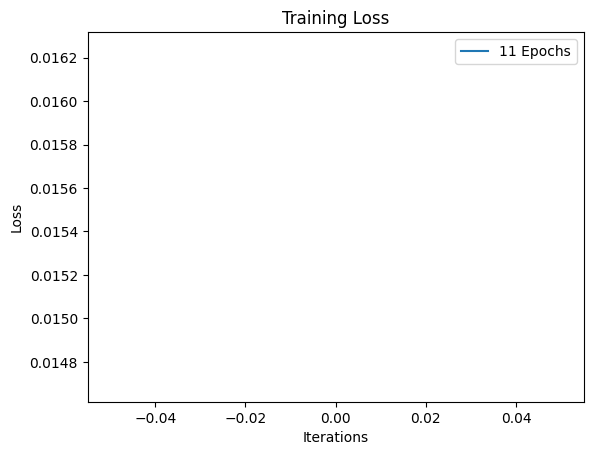


Test set: Average loss: 0.0001, Accuracy: 9823/10000 (98.23%)



In [25]:
train(model, train_loader, optimizer_without_opt, criterion, 11)
test(model, test_loader)

In [26]:
# plt.savefig(“file_name.png”)

With the addtion of a Dropout layer, it increses the accuracy to **(99.11%)**, whcich has outperfomed all the other models by a large margin, with also a significantly reduced loss

## Weight Decay
Weight decay is a regularization technique that penalizes large weights in the neural network by adding a regularization term to the loss function. It encourages the model to learn simpler and smoother decision boundaries, which helps prevent overfitting.

In practice, weight decay is implemented as L2 regularization, where the regularization term is the sum of squares of all the model parameters multiplied by a regularization parameter (lambda or decay rate). The weight decay parameter controls the strength of regularization.

In [27]:
# Define the optimizer with weight decay (L2 regularization)
optimizer_with_weight_decay = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)

Train Epoch: 0 [0/60000 (0%)]	Loss: 0.011377
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.000890
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.005300
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.014202
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.001110
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.000821
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.001757
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.008985
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.010704
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.020467
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.003670
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.000897
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.009282
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.015769
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.000292
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.006029
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.002164
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.001185
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.004362
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.006765
Train Epoch:

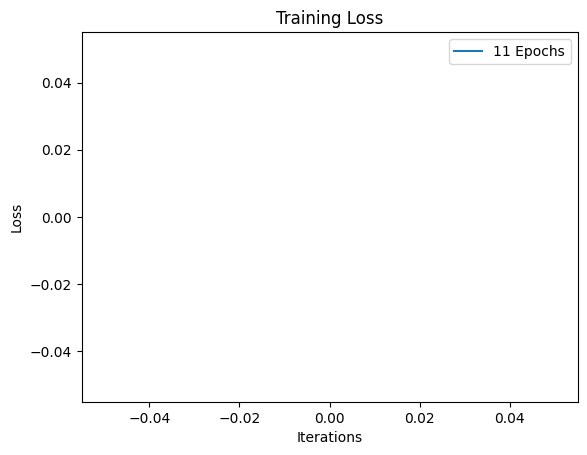


Test set: Average loss: 0.0000, Accuracy: 9905/10000 (99.05%)



In [33]:
train(model, train_loader, optimizer_with_weight_decay, criterion, 11)
test(model, test_loader)

The model using a weight decay of **0.01**, performed better with **99.14%** accuracy, and then, most importantly the loss was reduced in this model where the peak was **0.003** compared to **0.008** of the previous weight decay of **0.001**

In [31]:
model.eval()

torch.save(model.state_dict(), 'modelCNN.pt')

## Conclusion

In conclusion the cnn model was built from scratch using the pytorch, numpy packages.

The model was trained using the MNIST dataste, which is a dataset of 60,000 handwritten numbers saved as images.

The model consited of two convolutional layers, wuth ReLu activation function, and a dropput layer, a pooling layer and two fully connected layers. During training the model was then tuned using regularization and weight decay parameters

The model after tuning the parameters gave an output accuracy of 99.14% with 0.0001 loss